In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 예측

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/고용노동부 공모전/고용노동부_사고재해자 개별자료_20221231.csv", encoding='euc-kr')
df.head()

,연도,성별,연령대,근속기간,대업종,사업장규모,재해자구분,재해유형
0,2022,여,30대,6개월 미만,제조업,50인~99인,사고사망자,끼임
1,2022,남,50대,6개월 미만,건설업,5인~9인,사고사망자,무너짐
2,2022,남,30대,6개월 미만,제조업,10인~19인,사고사망자,폭발파열
3,2022,남,60대 이상,6개월 미만,운수·창고·통신업,30인~49인,사고사망자,사업장외교통사고
4,2022,남,50대,1년~2년,운수·창고·통신업,10인~19인,사고사망자,사업장외교통사고


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus = False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df1 = df.copy()
df1['성별'] = label_encoder.fit_transform(df1['성별'])
df1['연령대'] = label_encoder.fit_transform(df1['연령대'])
df1['근속기간'] = label_encoder.fit_transform(df1['근속기간'])
df1['대업종'] = label_encoder.fit_transform(df1['대업종'])
df1['사업장규모'] = label_encoder.fit_transform(df1['사업장규모'])
df1['재해유형'] = label_encoder.fit_transform(df1['재해유형'])

df1 = df1.drop(['연도','재해자구분'], axis=1)
df1

,성별,연령대,근속기간,대업종,사업장규모,재해유형
0,1,2,6,9,7,3
1,0,4,6,0,9,8
2,0,2,6,9,2,20
3,0,5,6,6,5,14
4,0,4,1,6,2,14
...,...,...,...,...,...,...
107209,0,5,2,3,8,14
107210,0,3,0,3,5,14
107211,0,5,7,3,8,14
107212,0,4,0,3,8,14


# 시각화

In [ ]:

# 재해유형: 분류불능 34개 제거
for i in range(len(df)):
  if df['재해유형'][i] == '분류불능':
    df.drop(i, inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107180 entries, 0 to 107179
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연도      107180 non-null  int64 
 1   성별      107180 non-null  object
 2   연령대     107180 non-null  object
 3   근속기간    107180 non-null  object
 4   대업종     107180 non-null  object
 5   사업장규모   107180 non-null  object
 6   재해자구분   107180 non-null  object
 7   재해유형    107180 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.5+ MB


In [ ]:
sns.heatmap(df1, annot=True)

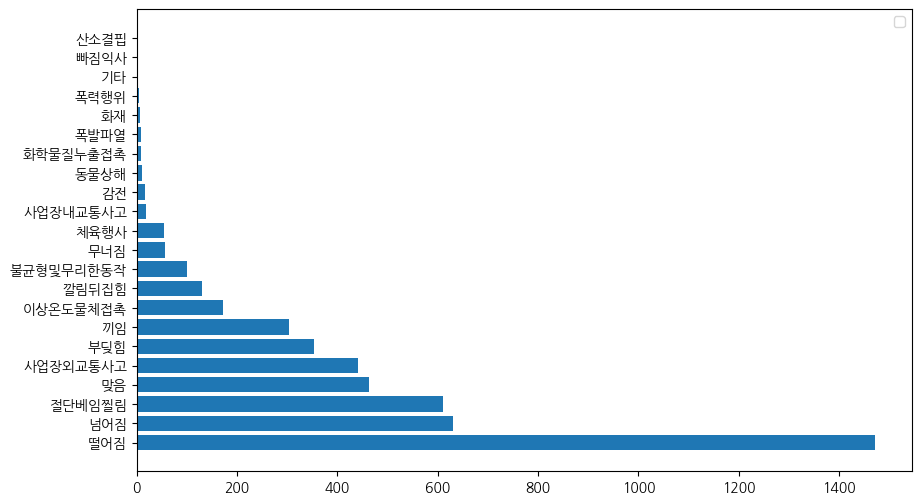

In [ ]:
# 남자의 재해유형

df_male=df[df['성별']=='남'].value_counts().to_frame().reset_index()

fig, axs = plt.subplots(figsize = (10,6))
plt.barh(df_male["재해유형"], df_male['count'])
plt.legend()
plt.show()


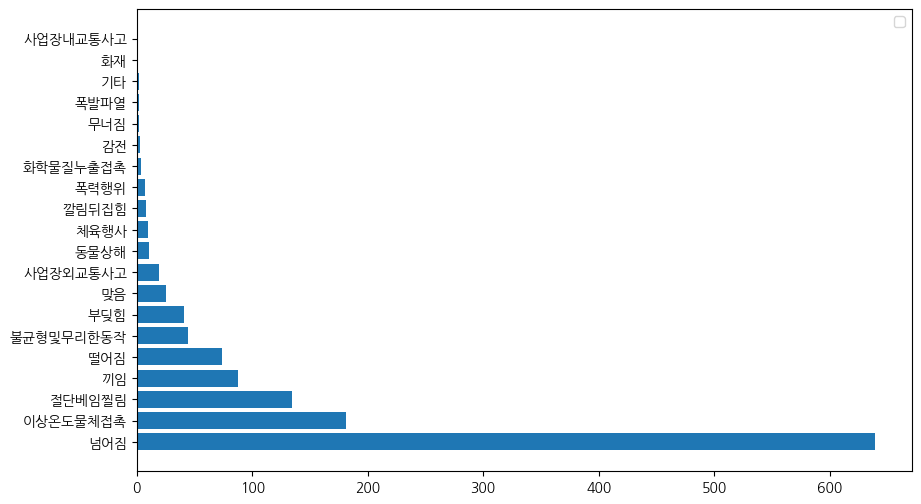

In [ ]:
# 여자의 재해유형

df_female=df[df['성별']=='여'].value_counts().to_frame().reset_index()

fig, axs = plt.subplots(figsize = (10,6))
plt.barh(df_female["재해유형"], df_female['count'])
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


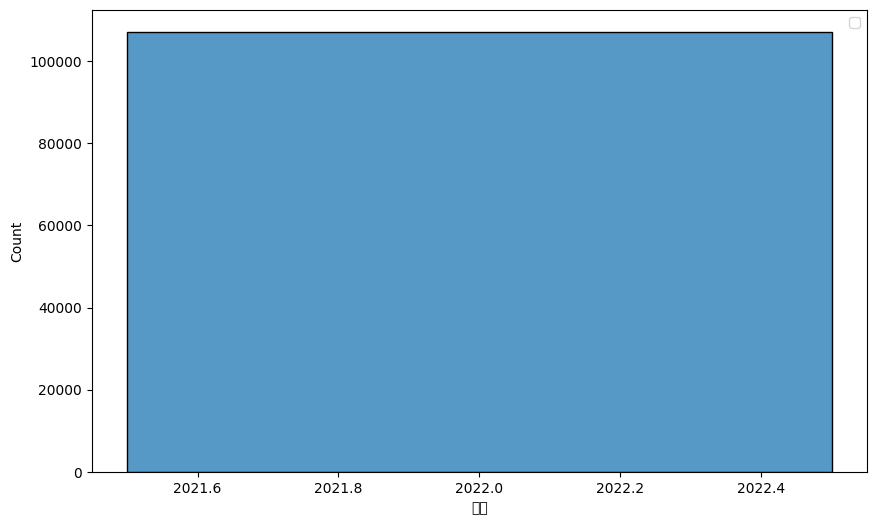

In [ ]:
fig, axs = plt.subplots(figsize = (10,6))

sns.histplot(df["연도"], ax =axs)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


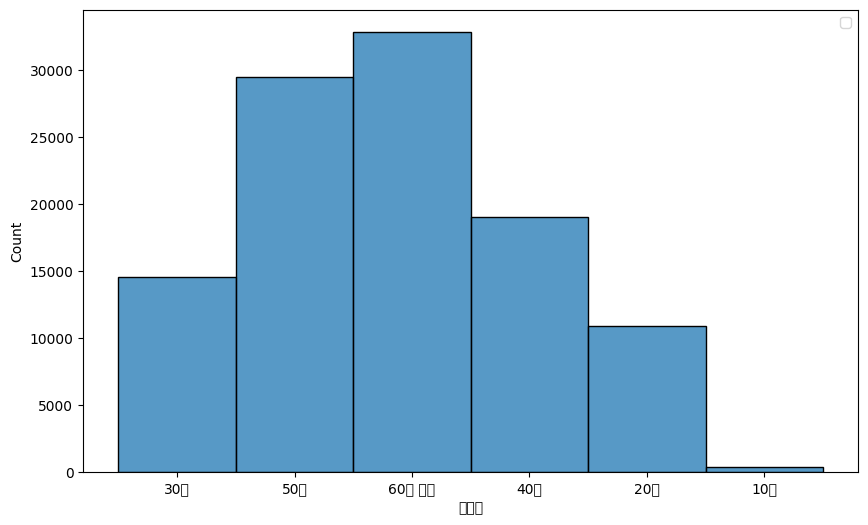

In [ ]:
fig, axs = plt.subplots(figsize = (10,6))

sns.histplot(df["연령대"], ax =axs)
plt.legend()
# sns.histplot(df["근속기간"], ax =axs)
# sns.histplot(df["대업종"], ax =axs[0], kde=True)
# sns.histplot(df["사업장규모"], ax =axs[0], kde=True)
# sns.histplot(df["재해자구분"], ax =axs[0], kde=True)

plt.show()

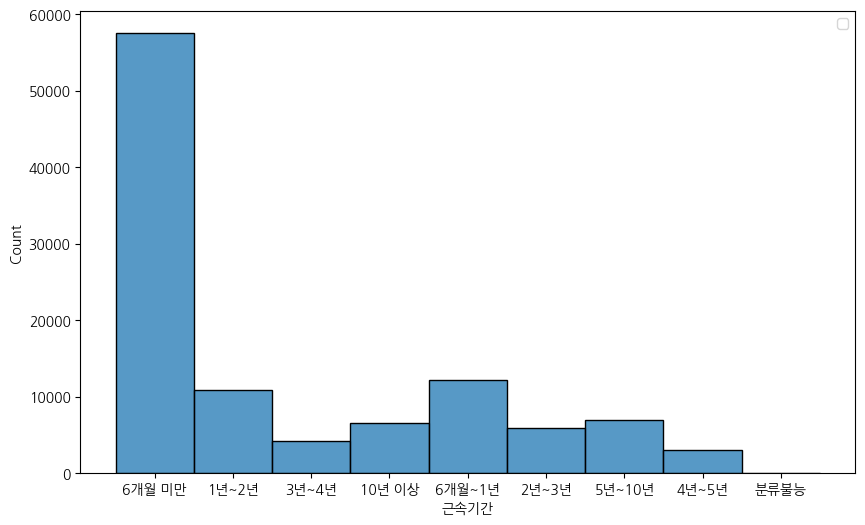

In [ ]:
fig, axs = plt.subplots(figsize = (10,6))
sns.histplot(df["근속기간"], ax =axs)
plt.legend()
plt.show()

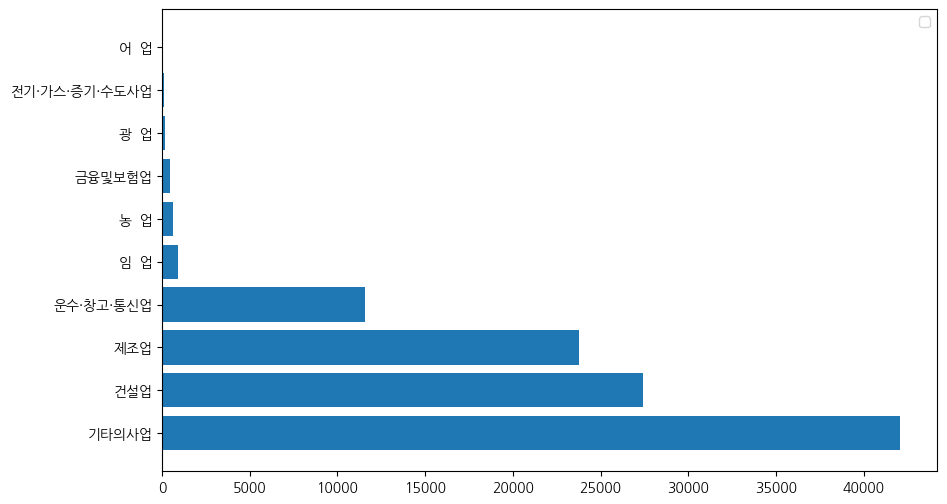

In [ ]:
df1=df['대업종'].value_counts().to_frame().reset_index()

fig, axs = plt.subplots(figsize = (10,6))
plt.barh(df1["대업종"], df1['count'])
plt.legend()
plt.show()

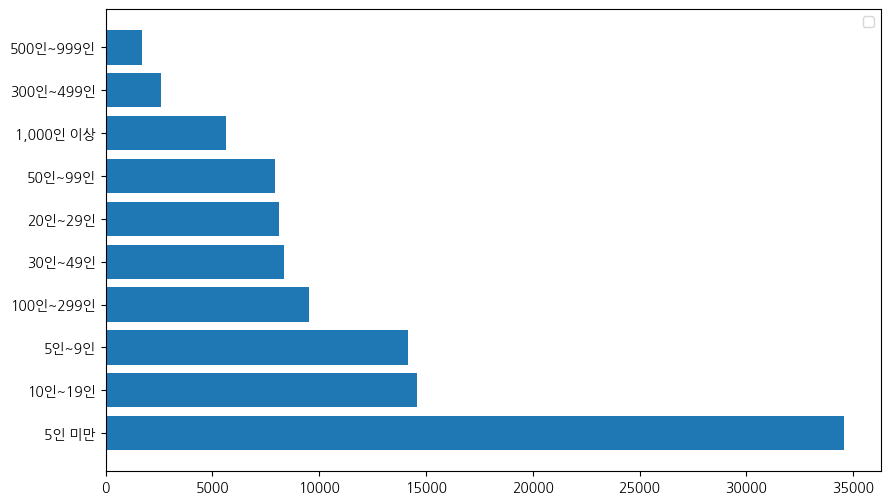

In [ ]:
df1=df['사업장규모'].value_counts().to_frame().reset_index()
fig, axs = plt.subplots(figsize = (10,6))
plt.barh(df1["사업장규모"], df1['count'])
plt.legend()
plt.show()

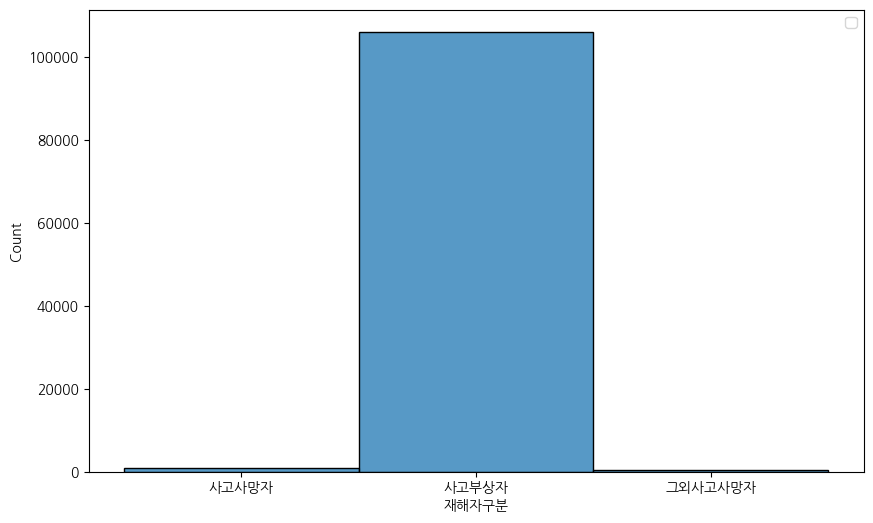

In [ ]:
fig, axs = plt.subplots(figsize = (10,6))
sns.histplot(df["재해자구분"], ax =axs)
plt.legend()
plt.show()

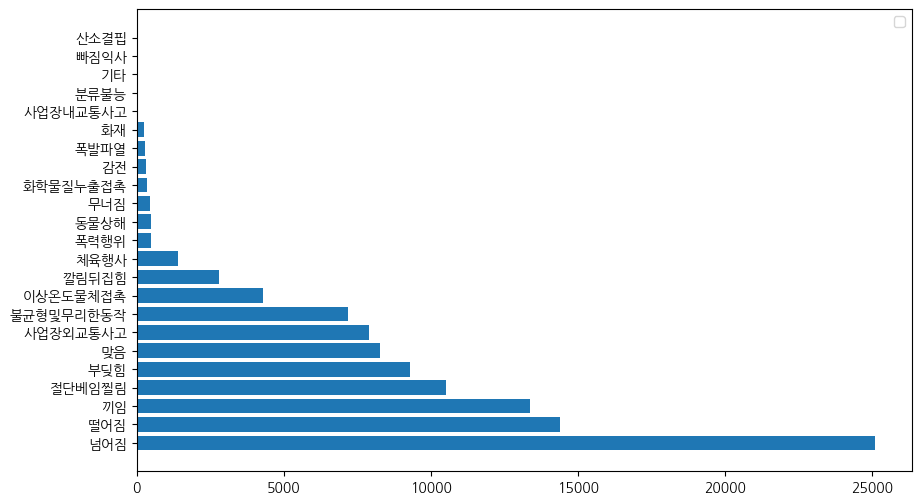

In [ ]:
df1=df['재해유형'].value_counts().to_frame().reset_index()

fig, axs = plt.subplots(figsize = (10,6))
plt.barh(df1["재해유형"], df1['count'])
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 로지스틱회귀


In [ ]:
target = df['재해유형']
feature = df.drop(columns=['재해유형', '재해자구분','연도'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

df1 = df.copy()
df1['성별'] = label_encoder.fit_transform(df1['성별'])
df1['연령대'] = label_encoder.fit_transform(df1['연령대'])
df1['근속기간'] = label_encoder.fit_transform(df1['근속기간'])
df1['대업종'] = label_encoder.fit_transform(df1['대업종'])
df1['사업장규모'] = label_encoder.fit_transform(df1['사업장규모'])
df1 = df1.drop(['연도','재해자구분','재해유형'], axis=1)
df1

,성별,연령대,근속기간,대업종,사업장규모
0,1,2,6,9,7
1,0,4,6,0,9
2,0,2,6,9,2
3,0,5,6,6,5
4,0,4,1,6,2
...,...,...,...,...,...
107175,0,5,2,3,8
107176,0,3,0,3,5
107177,0,5,7,3,8
107178,0,4,0,3,8


In [ ]:
target_encoded

array([ 3,  8, 19, ..., 13, 13, 13])

In [ ]:
feature

,성별,연령대,근속기간,대업종,사업장규모
0,여,30대,6개월 미만,제조업,50인~99인
1,남,50대,6개월 미만,건설업,5인~9인
2,남,30대,6개월 미만,제조업,10인~19인
3,남,60대 이상,6개월 미만,운수·창고·통신업,30인~49인
4,남,50대,1년~2년,운수·창고·통신업,10인~19인
...,...,...,...,...,...
107175,남,60대 이상,2년~3년,기타의사업,5인 미만
107176,남,40대,10년 이상,기타의사업,30인~49인
107177,남,60대 이상,6개월~1년,기타의사업,5인 미만
107178,남,50대,10년 이상,기타의사업,5인 미만


In [ ]:
target.shape

(107180,)

In [ ]:
# 원핫인코딩
encoded_feature = pd.get_dummies(df)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_feature,target_encoded, test_size = 0.25, stratify=target_encoded)

### 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('로지스틱회귀 정확도:', accuracy)


### 결정트리
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=19,min_impurity_decrease=0.0001)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정트리 정확도:', accuracy)


### XgBoost
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('XgBoost 정확도:', accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱회귀 정확도: 0.8513528643403621
결정트리 정확도: 0.9997760776264228
XgBoost 정확도: 1.0


In [ ]:
target_encoded

array([ 3,  8, 19, ..., 13, 13, 13])

### 과적합 확인

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encoded_feature,target_encoded, test_size = 0.2, stratify=target_encoded)

sub_input, val_input, sub_target, val_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(sub_input.shape, val_input.shape)

(68595, 63) (17149, 63)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=15)
clf.fit(sub_input, sub_target)

print(clf.score(sub_input, sub_target))
print(clf.score(val_input, val_target))

0.9944893942707195
0.9935856318152662


In [ ]:
# 교차검증
from sklearn.model_selection import cross_validate
scores = cross_validate(clf, X_train, y_train)
print(scores)

{'fit_time': array([0.20594215, 0.17635012, 0.17597532, 0.15629268, 0.15205407]), 'score_time': array([0.00952649, 0.00921965, 0.00926065, 0.00799346, 0.00795746]), 'test_score': array([0.99428538, 0.99434369, 0.99428538, 0.99428538, 0.99434336])}


In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(clf, X_train, y_train, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.9943086400765486


In [ ]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(clf, X_train, y_train, cv=splitter)
print(np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


0.9943086434613834


### 그리드서치

In [ ]:
# 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

dt = gs.best_estimator_
print(dt.score(X_train, y_train))
print(gs.best_params_)
print(gs.cv_results_['mean_test_score'])

0.9999377993406731
{'min_impurity_decrease': 0.0001}
[0.9999378  0.99980096 0.99980096 0.99955216 0.99955216]


In [ ]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [ ]:
params = {'min_impurity_decrease':np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5,20,1),
          'min_samples_split': range(2,100,10)}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_)

{'max_depth': 19, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}


In [ ]:
np.max(gs.cv_results_['mean_test_score'])

0.9998009578901537

### 예측 결과 예시

In [ ]:
# 테스트할 샘플 데이터 추출
sample_data = encoded_feature.iloc[5,:].to_frame().T
sample_data


,연도,성별_남,성별_여,연령대_10대,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대 이상,근속기간_10년 이상,...,재해유형_사업장내교통사고,재해유형_사업장외교통사고,재해유형_산소결핍,재해유형_이상온도물체접촉,재해유형_절단베임찔림,재해유형_체육행사,재해유형_폭력행위,재해유형_폭발파열,재해유형_화재,재해유형_화학물질누출접촉
5,2022,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 예측
y_pred = clf.predict(sample_data)

In [ ]:
y_pred[0]

8

In [ ]:
target_encoded[5]

8

In [ ]:
df_target.iloc[y_pred[0],0]

'무너짐'

In [ ]:
df_target = pd.read_csv('/content/drive/MyDrive/고용노동부 공모전/target.csv', encoding='euc-kr')
df_target.

,재해유형,숫자
0,감전,0
1,기타,1
2,깔림뒤집힘,2
3,끼임,3
4,넘어짐,4
5,동물상해,5
6,떨어짐,6
7,맞음,7
8,무너짐,8
9,부딪힘,9
